In [112]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [116]:
data_orig=pd.read_csv('heart_failure_clinical_records_dataset.csv')
data_synthetic=pd.read_csv('heart_failure_clinical_records_dataset_synthetic_correlated-2.csv')
print(data_orig.head())
print(data_synthetic.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [118]:
merged_data = pd.concat([data_orig, data_synthetic], ignore_index=True)
merged_data.platelets = merged_data.platelets/1000

### Exploratory Data Analysis

In [6]:
data_orig.shape

(299, 13)

In [7]:
data_synthetic.shape

(299, 13)

In [8]:
merged_data.shape

(598, 13)

In [9]:
merged_data.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                     582.0         0               20.0   
1  55.0        0                    7861.0         0               38.0   
2  65.0        0                     146.0         0               20.0   
3  50.0        1                     111.0         0               20.0   
4  65.0        1                     160.0         1               20.0   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265.00000               1.9         130.0    1   
1                    0  263.35803               1.1         136.0    1   
2                    0  162.00000               1.3         129.0    1   
3                    0  210.00000               1.9         137.0    1   
4                    0  327.00000               2.7         116.0    0   

   smoking  time  DEATH_EVENT  
0        0   4.0          1.0  
1        0   6.0          1.0  
2        1   7.0          1.0  
3        0   7.0          1.0  
4        0   8.0          1.0

In [10]:
values_of_each=pd.DataFrame({
    'count': merged_data.count(),
    'min': merged_data.min(),
    'max': merged_data.max(),
})
values_of_each

count    min     max
age                         598   40.0    95.0
anaemia                     598    0.0     1.0
creatinine_phosphokinase    598   23.0  7861.0
diabetes                    598    0.0     1.0
ejection_fraction           598   14.0    80.0
high_blood_pressure         598    0.0     1.0
platelets                   598   25.1   850.0
serum_creatinine            598    0.0     9.4
serum_sodium                598  113.0   148.0
sex                         598    0.0     1.0
smoking                     598    0.0     1.0
time                        598    4.0   285.0
DEATH_EVENT                 598    0.0     1.0

In [11]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       598 non-null    float64
 1   anaemia                   598 non-null    int64  
 2   creatinine_phosphokinase  598 non-null    float64
 3   diabetes                  598 non-null    int64  
 4   ejection_fraction         598 non-null    float64
 5   high_blood_pressure       598 non-null    int64  
 6   platelets                 598 non-null    float64
 7   serum_creatinine          598 non-null    float64
 8   serum_sodium              598 non-null    float64
 9   sex                       598 non-null    int64  
 10  smoking                   598 non-null    int64  
 11  time                      598 non-null    float64
 12  DEATH_EVENT               598 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 60.9 KB


In [12]:
statistics_of_data = pd.DataFrame({
    'mean': merged_data.mean(),
    'std': merged_data.std(),
    '25%': merged_data.quantile(0.25),
    '50%': merged_data.median(),
    '75%': merged_data.quantile(0.75),
})
statistics_of_data

mean          std     25%      50%        75%
age                         63.544037    13.982155   53.00   62.000    73.0000
anaemia                      0.397993     0.489894    0.00    0.000     1.0000
creatinine_phosphokinase  1902.891304  2267.395647  190.25  585.000  3100.2500
diabetes                     0.376254     0.484851    0.00    0.000     1.0000
ejection_fraction           42.418060    15.921683   30.00   38.000    54.0000
high_blood_pressure          0.376254     0.484851    0.00    0.000     1.0000
platelets                  320.167799   176.682215  216.00  268.234   376.7985
serum_creatinine             2.394264     2.319827    1.00    1.180     3.0000
serum_sodium               134.757525     7.249310  132.00  136.000   140.0000
sex                          0.603679     0.489542    0.00    1.000     1.0000
smoking                      0.311037     0.463305    0.00    0.000     1.0000
time                       136.110368    78.121590   76.25  121.500   207.0000
DEATH_EVENT                  0.408027     0.491880    0.00    0.000     1.0000

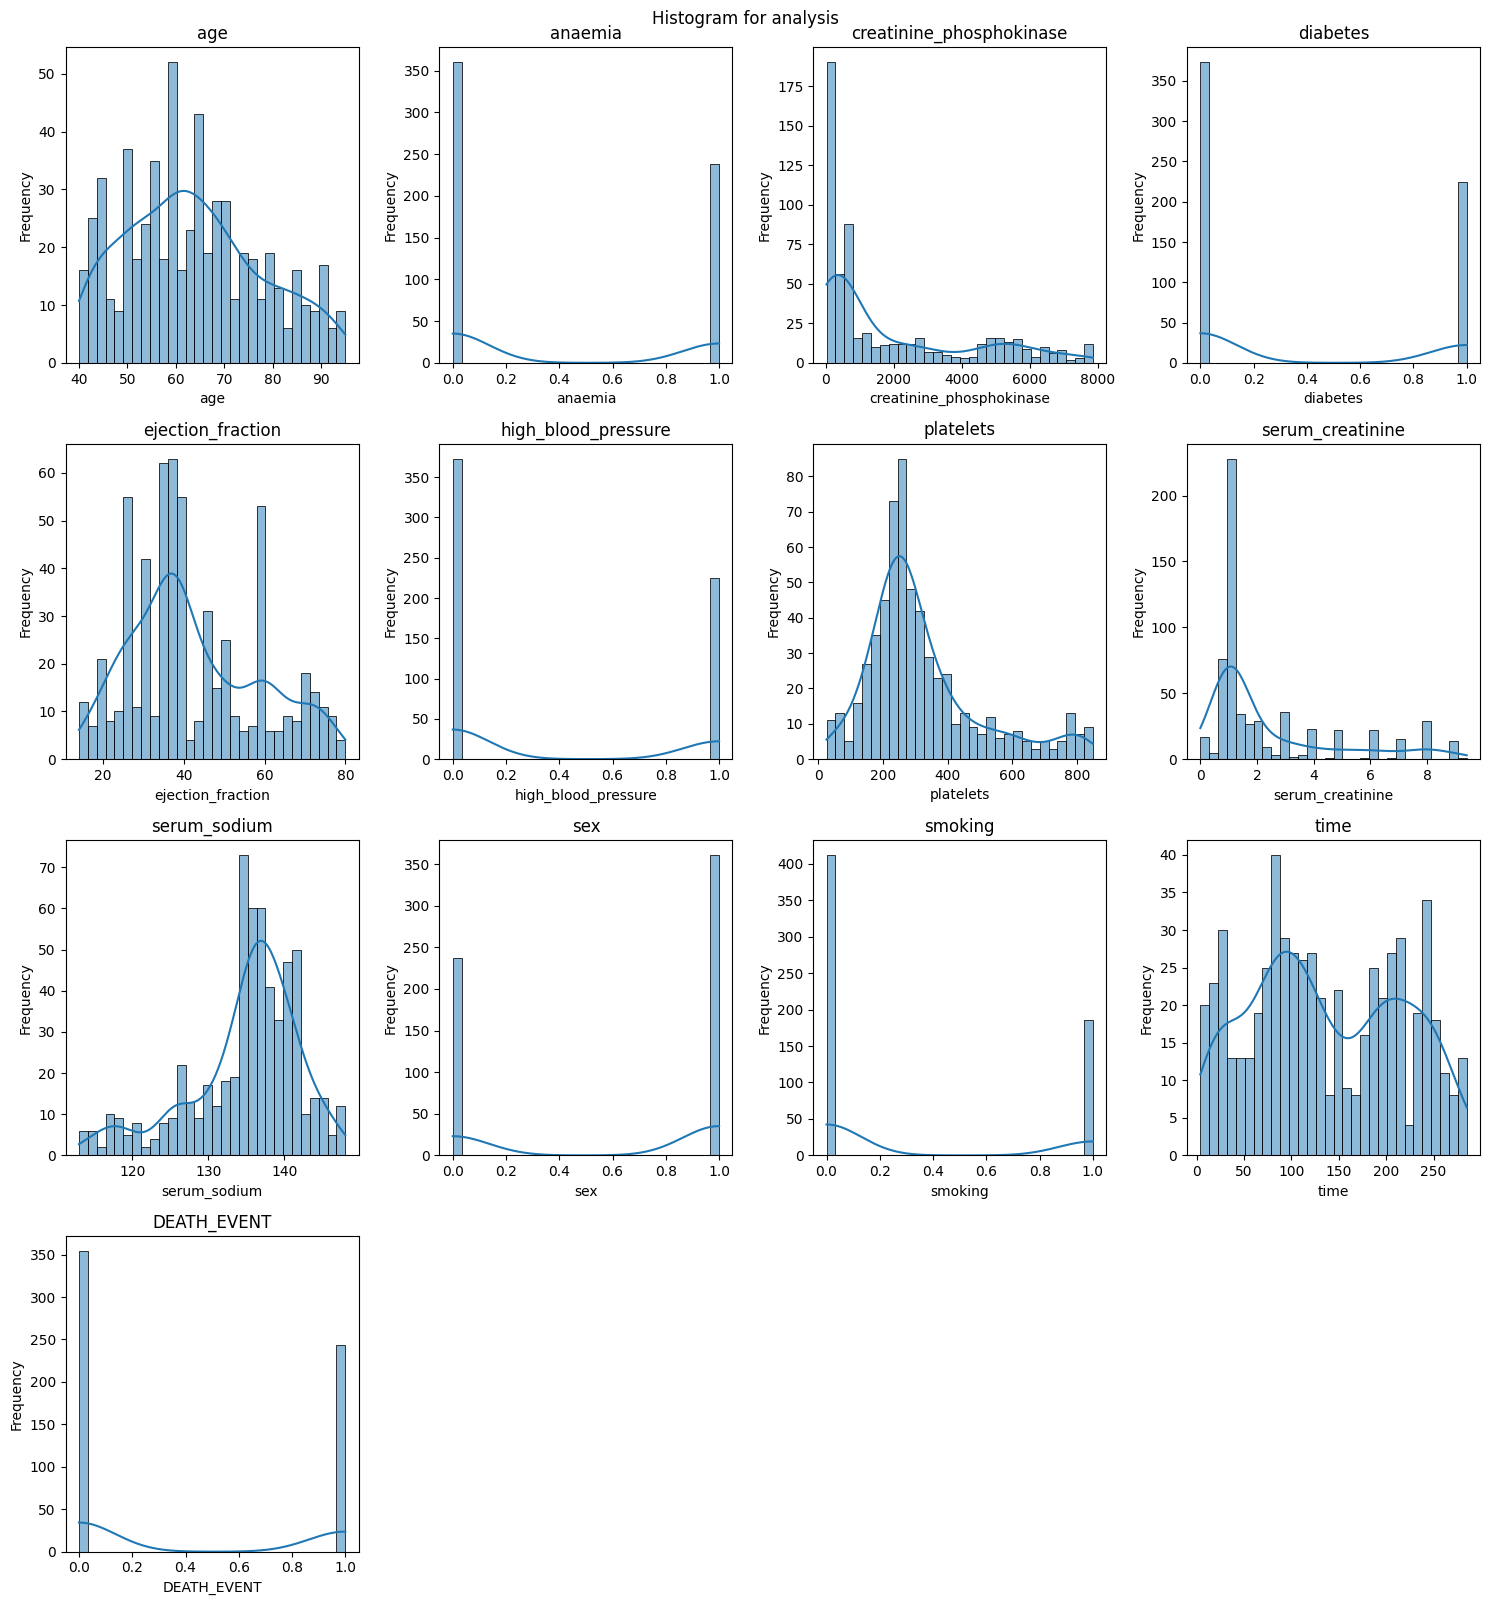

In [14]:

numeric_columns = merged_data.select_dtypes(include='number')

fig, axes = plt.subplots(4, 4, figsize=(15, 16))
axes = axes.flatten() 

for i, col in enumerate(numeric_columns.columns):
    sns.histplot(numeric_columns[col], bins=30, kde=True, edgecolor='black', ax=axes[i])  
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) 
plt.tight_layout()  
plt.suptitle('Histogram for analysis', fontsize=12,y=1)  
plt.show()


###### From the above graphs, we can deduce the following: Age indicates that most patients are middle-aged or older, with a peak in the 60s and a generally normal distribution. Most people with heart disease do not have anemia as per the plot.Few people exhibited very high levels of creatinine phosphokinase, as shown by the extreme right skew of the distribution, while concentrated the majority of results at lower levels. Heart disease is more common in those without diabetes than in those with the illness. Ejection Fraction shows almost a symmetric distribution. Again, people who do not have blood pressure are more likely to have a heart problem compared to people that do. There are a few patients with noticeably elevated platelet counts, as indicated by the right-skewed distribution with a peak at 300,000. For serum_creatinine, most values are close to 1, indicating normal or slightly higher levels, and the data is right-skewed. Serum Sodium is left skewed with more concentration at around 130-140. Men(1) are more likely to face heart problems than women according to the gender graph. Majorly non smokers are more prone to heart problems than smokers. Time is more of a uniform distribution.

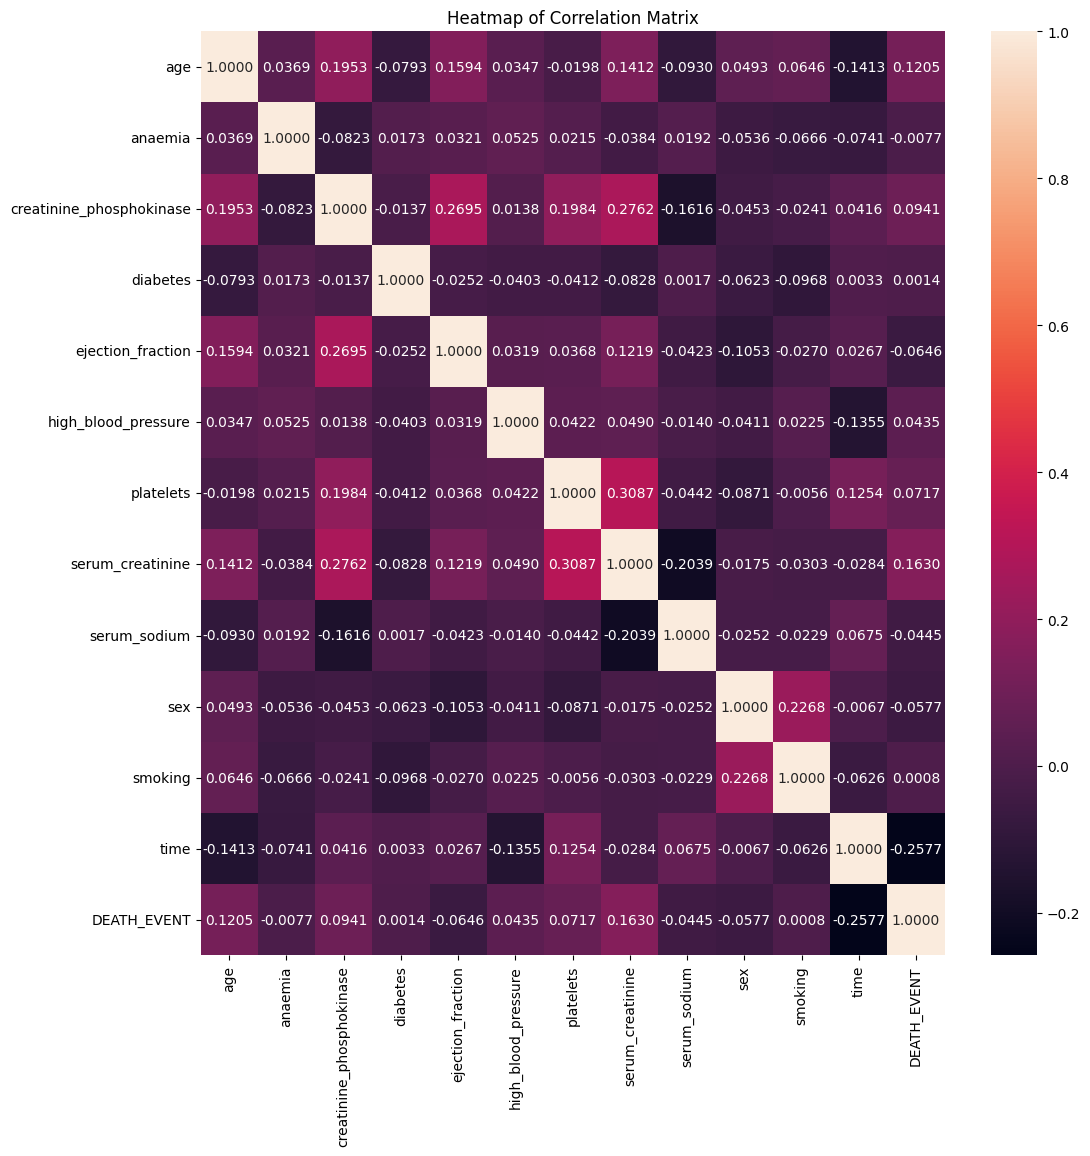

In [16]:
correlation_matrix = merged_data.corr()

plt.figure(figsize=(12, 12))


sns.heatmap(correlation_matrix, 
            annot=True,               
            fmt='.4f',)         

plt.title('Heatmap of Correlation Matrix', fontsize=12)
plt.show()


##### Individual factors may not be a strong predictor of mortality in this dataset, as evidenced by the modest correlations between DEATH_EVENT and the majority of clinical factors (such as diabetes, high blood pressure, anemia, etc.). They might, however, have a greater effect if examined in combination with other factors.The most significant factors in relation to death (DEATH_EVENT) seem to be time, serum_creatinine, and, to a lesser extent, age and ejection_fraction.

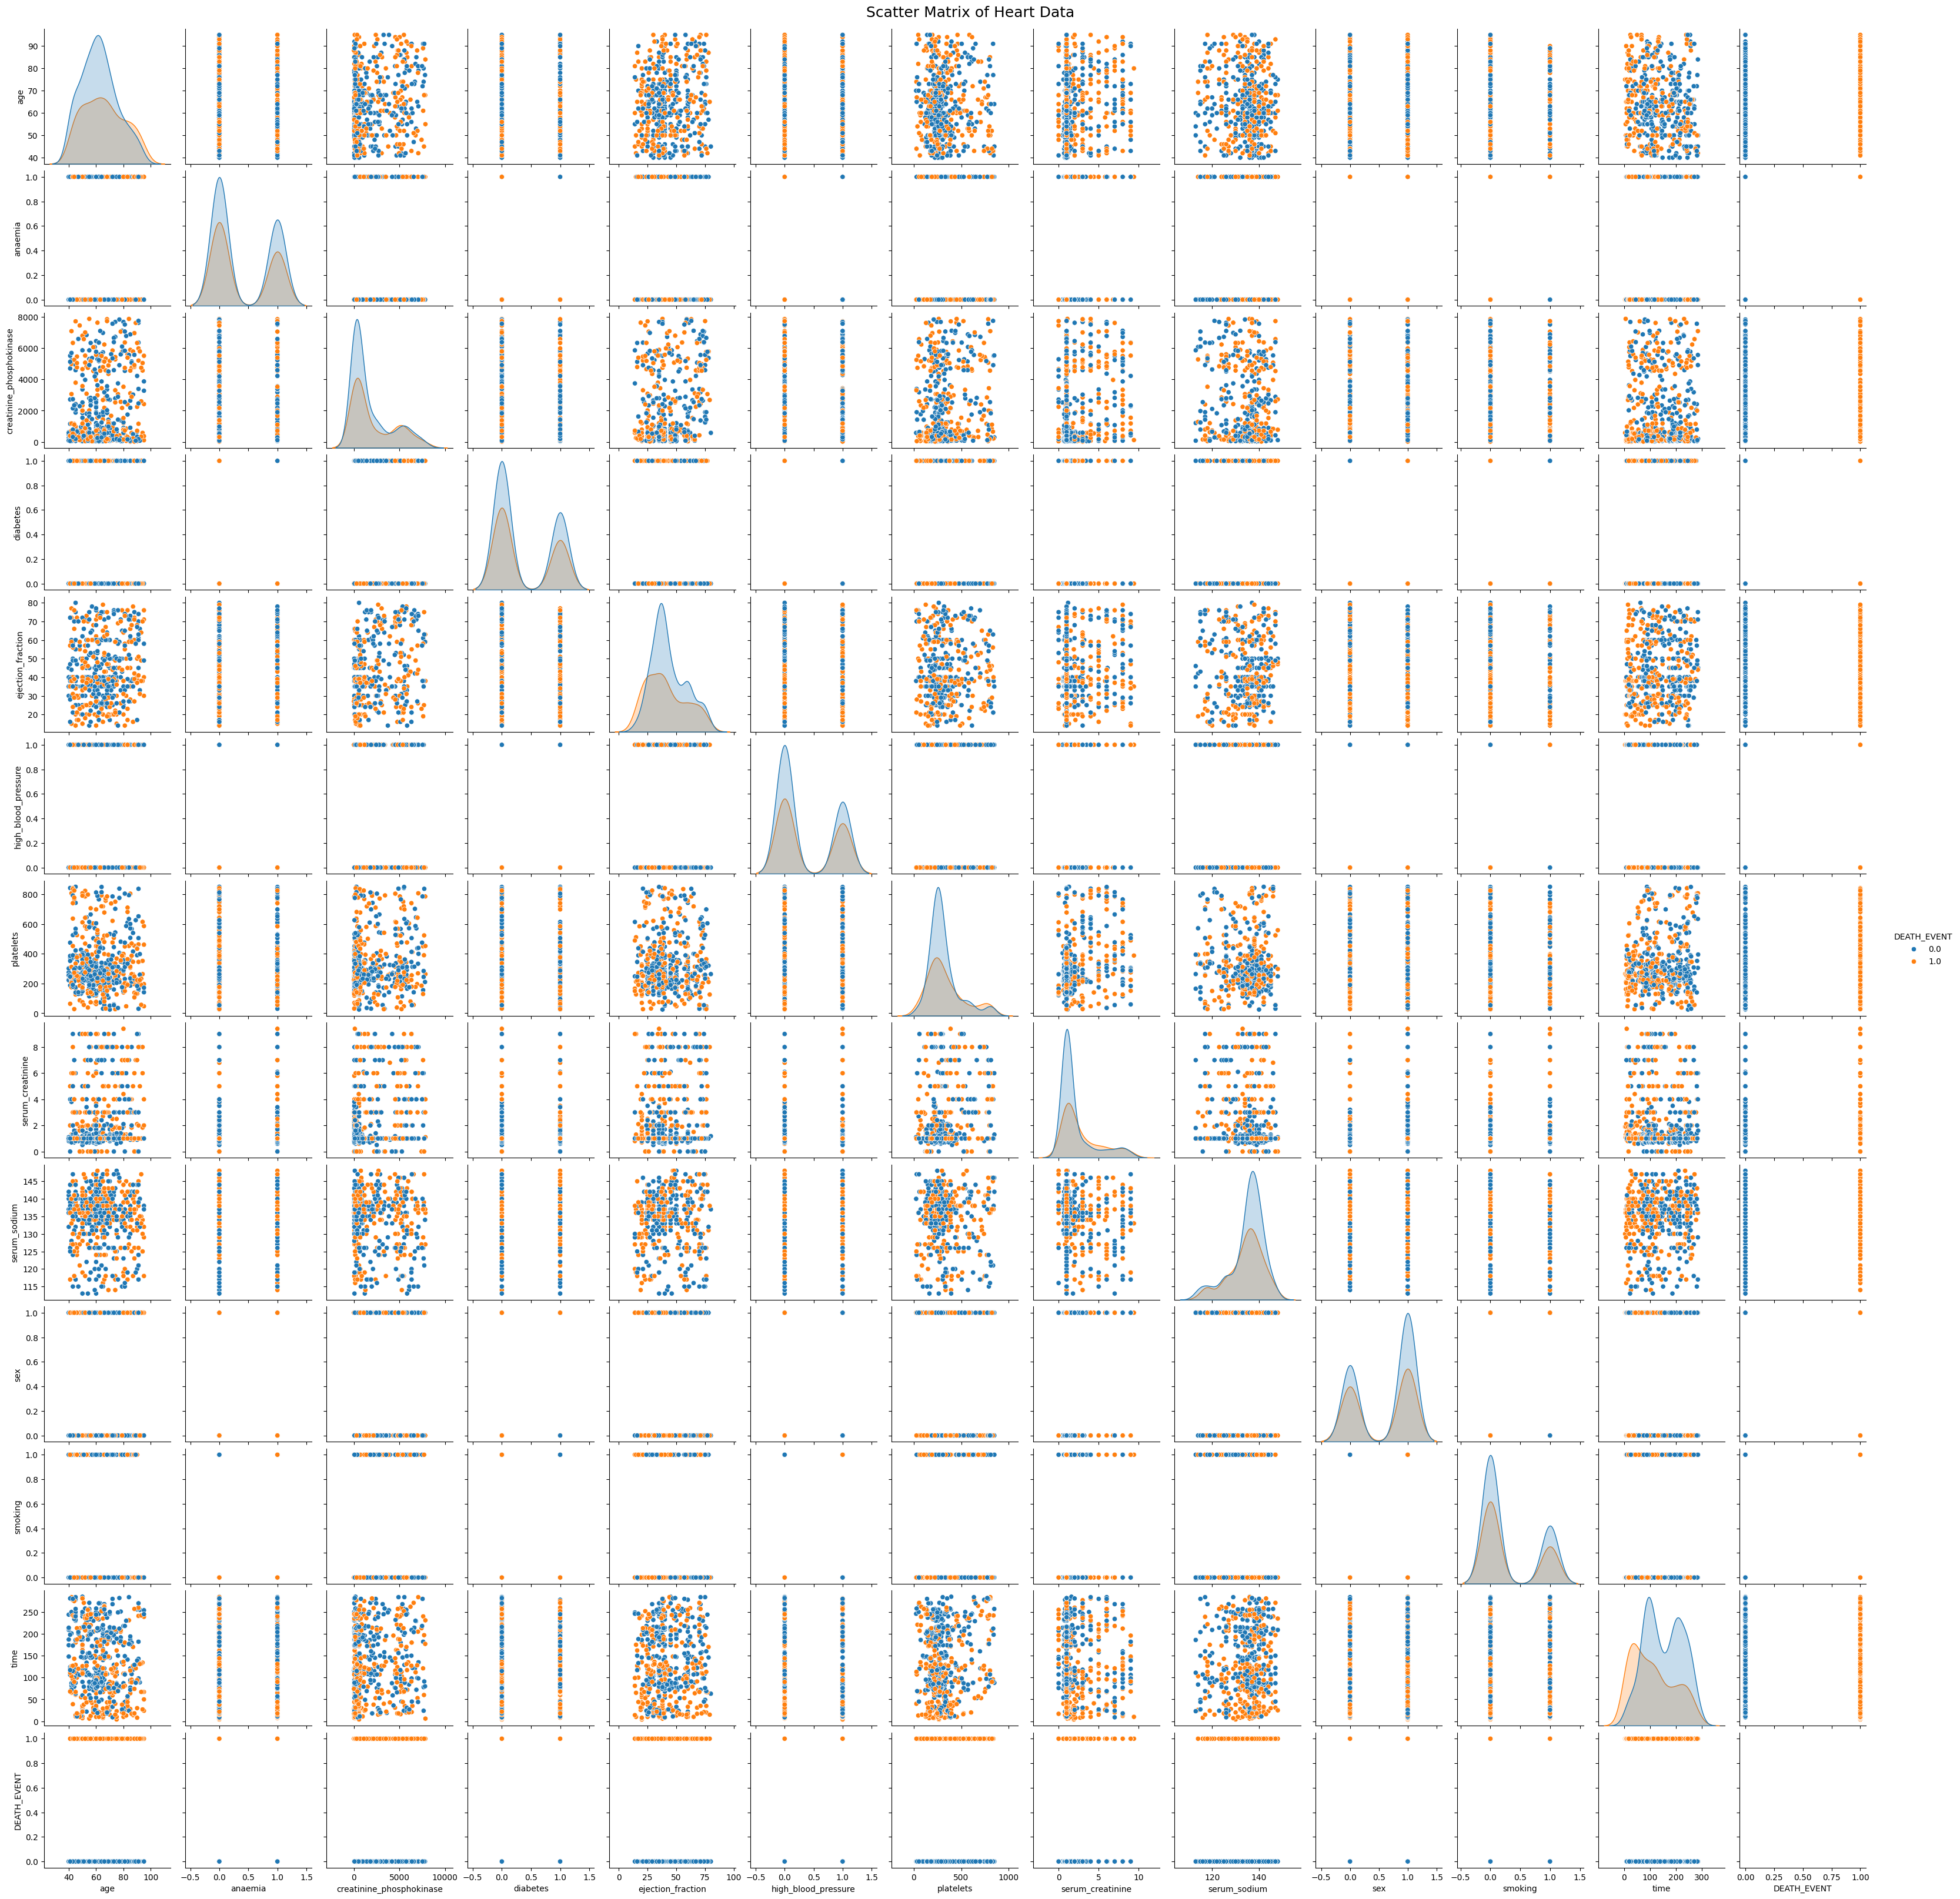

In [18]:
sns.pairplot(merged_data, vars=numeric_columns, hue='DEATH_EVENT')

plt.suptitle('Scatter Matrix of Heart Data', y=1,fontsize=18) 
plt.show()


###### The scatter matrix plot highlights the distinctions between patients who survived and those who did not, providing important insights into the correlations between the dataset's numerous attributes. The trend in the age distribution shows that older people account for a larger percentage of deaths. This implies that aging may be a major risk factor for heart failure, with a higher chance of worse outcomes for patients who are older. The concentration of death event in older age groups can suggest susceptibility to comorbidities or age-related health decline. The distributions of serum creatinine and creatinine phosphokinase exhibit significant skewness, with a few noteworthy outliers. These elevated readings are particularly noticeable in people who did not make it out alive. Increased levels of these indicators frequently indicate increased stress on the kidneys and heart, which may be a reflection of both organ damage and the general stress that heart failure patients experience. For some people, these markers could potentially be early warning signs of negative effects. Lower ejection fraction readings are more common in deceased patients. This implies that the ejection fraction, which measures decreased cardiac pumping efficiency, may be a key indicator of survival. These low ejection fractions indicate heart function impairment, which is a significant factor in patient prognosis and may identify high-risk individuals with impaired cardiac function

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/714962262.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_death_event_0, data_death_event_1],
/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/714962262.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_death_event_0, data_death_event_1],
/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/714962262.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_death_event_0, data_death_event_1],
/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/714962262.py:9: M

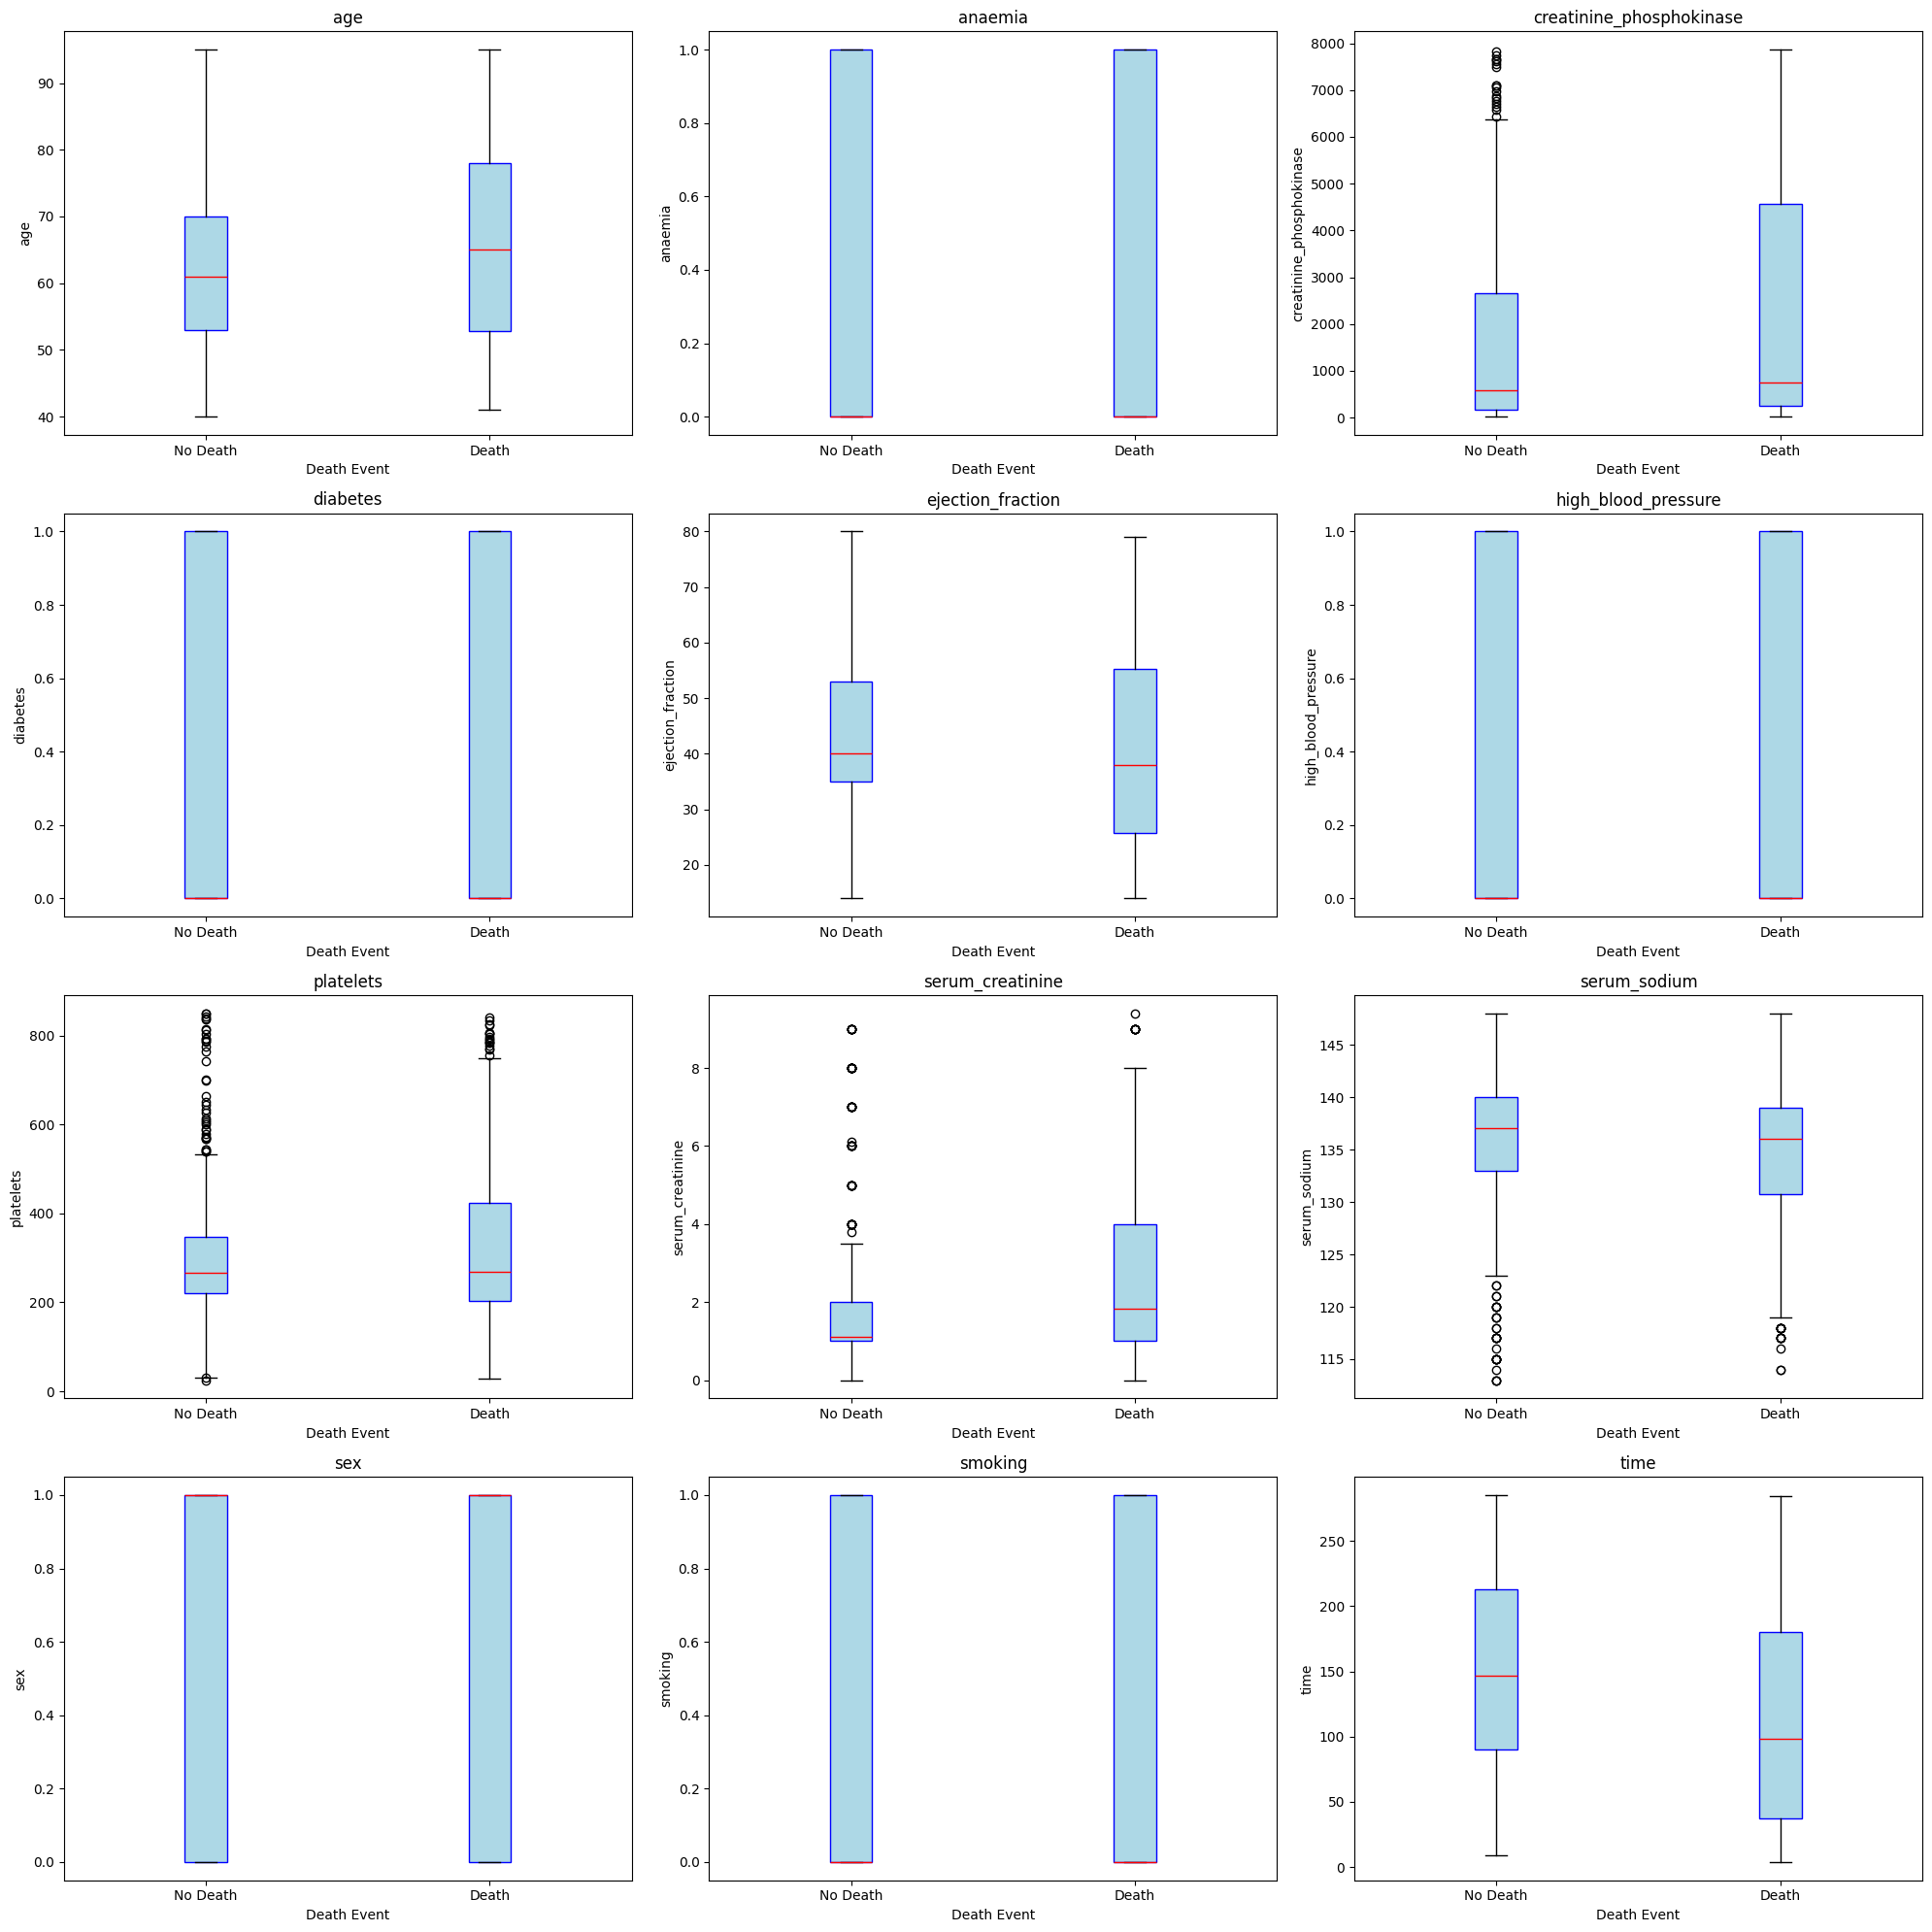

In [20]:
features = merged_data.columns[:-1]
plt.figure(figsize=(20, 20))

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1) 
    data_death_event_0 = merged_data[merged_data['DEATH_EVENT'] == 0][feature]
    data_death_event_1 = merged_data[merged_data['DEATH_EVENT'] == 1][feature]

    plt.boxplot([data_death_event_0, data_death_event_1], 
                labels=['No Death', 'Death'], 
                patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'))

    plt.title(feature)
    plt.xlabel('Death Event')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


###### Several important markers of mortality risk in patients with heart failure are shown by the boxplot analysis of different variables. The majority of patients who died were older, indicating that age may be a risk factor. Elevated blood creatinine and lower serum sodium levels may suggest hyponatremia and impaired kidney function, both of which are linked to an increased risk of death, whereas greater creatinine phosphokinase values in these patients may indicate increased muscle or tissue damage. The significance of cardiac efficiency for survival is further highlighted by the fact that deceased patients are more likely to have lower ejection fraction levels, which indicate weaker heart function. On the other hand, there are less notable differences between the survival groups for variables including anemia, diabetes, high blood pressure, smoking, sex, and platelet count, which may indicate that these variables do not independently predict mortality in this dataset. Longer follow-up periods were observed in survivors, which may indicate effective heart failure treatment. Serum creatinine, serum sodium, ejection fraction, age, and creatinine phosphokinase seem to be the strongest predictive factors of survival outcomes in patients with heart failure.

In [22]:
features = merged_data.drop(columns=['DEATH_EVENT'])  
target = merged_data['DEATH_EVENT']                   

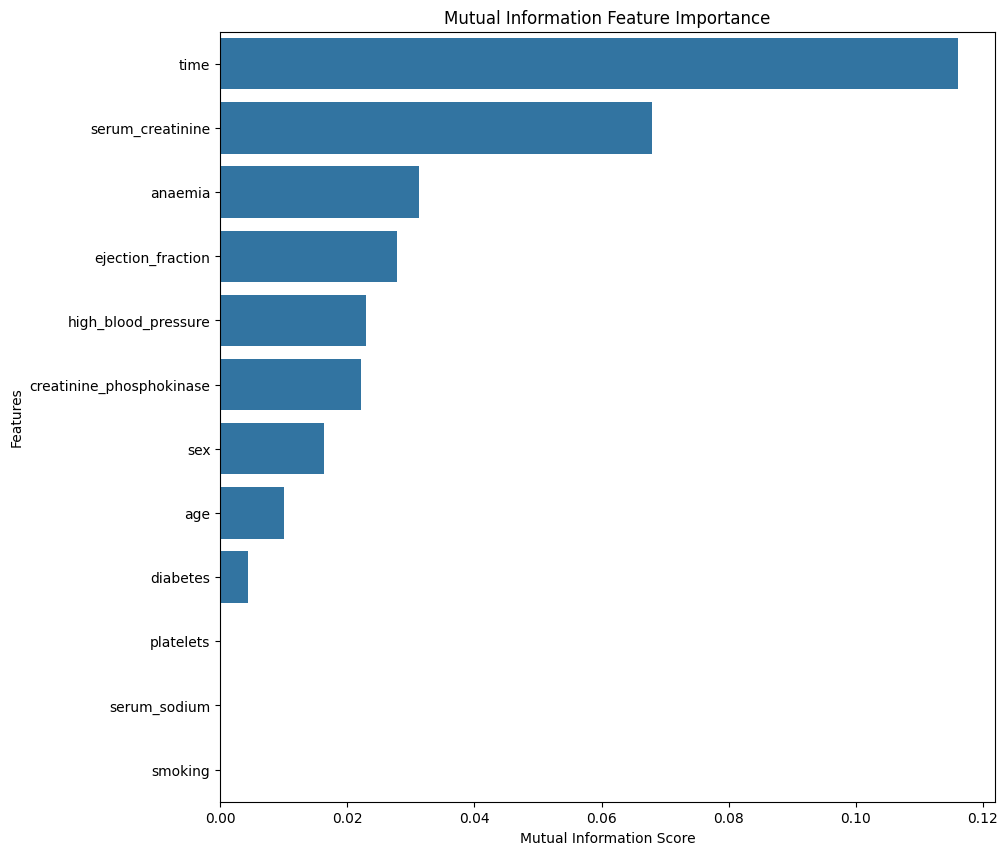

In [23]:
from sklearn.feature_selection import mutual_info_classif
score_mutual_iformation = mutual_info_classif(features, target)

mutual_info_df = pd.DataFrame({
    'Feature': features.columns,
    'Mutual Information': score_mutual_iformation}).sort_values(by='Mutual Information', ascending=False)

plt.figure(figsize=(10, 10))
plt.title('Mutual Information Feature Importance')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
sb.barplot(x='Mutual Information', y='Feature', data=mutual_info_df)
plt.show()

###### A clear ranking of the features that help predict mortality in patients with heart failure is provided by the Mutual Information Feature Importance graph. The most important element turns out to be time, showing that longer follow-up times are highly correlated with survival, but shorter ones would indicate a higher probability of mortality because of the patient's quick decline. The importance of kidney function is highlighted by the fact that serum creatinine ranks second; higher levels are associated with a higher risk of death. Age comes next, emphasizing that older patients are more likely to die, most often as a result of related comorbidities. Both diabetes and ejection fraction are important because they are associated with worse outcomes. Diabetes can make heart failure worse, and lower ejection fractions show decreased cardiac function. The moderate score for serum sodium indicates that abnormalities, especially low sodium levels, may indicate bad prognoses. Smoking and anemia both raise the risk of death, but not as much. On the other hand, characteristics such as sex, platelets, high blood pressure, and creatinine phosphokinase have little predictive value. According to this data, the most significant predictors of death are age, time, and serum creatinine; diabetes and ejection fraction also have a significant impact on patient outcomes.

### Feature Selection 

In [121]:
from sklearn.preprocessing import StandardScaler
merged_data_std = merged_data.copy()
feature_cont = ['time','age', 'ejection_fraction', 'creatinine_phosphokinase','serum_creatinine', 'serum_sodium', 'platelets']
feature_categorical = ['sex', 'diabetes', 'anaemia', 'high_blood_pressure', 'smoking']
for i, col in enumerate(feature_cont):
    merged_data_std [[col]] = StandardScaler(with_mean=True, with_std=True).fit_transform(merged_data_std [[col]])

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


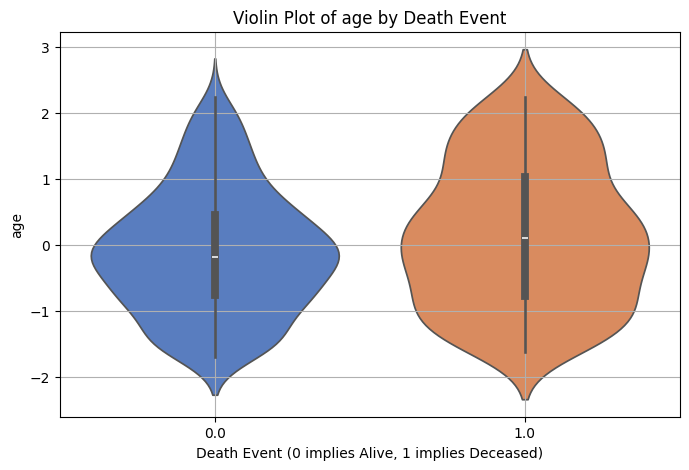

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


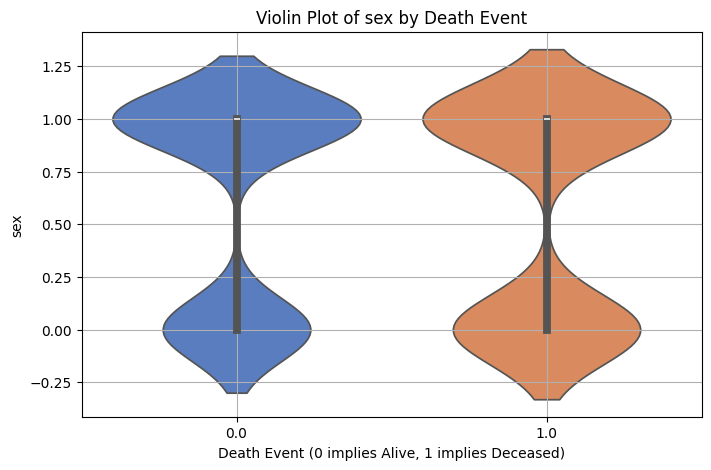

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


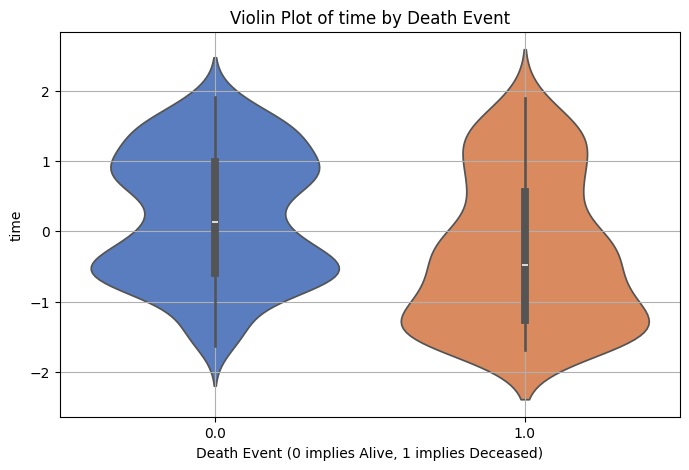

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


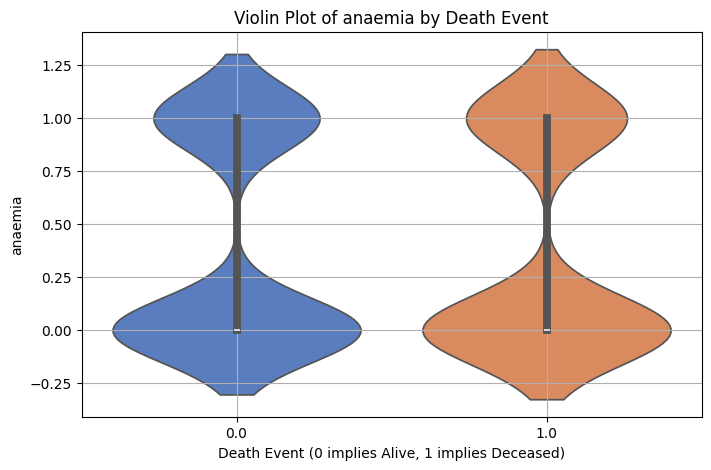

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


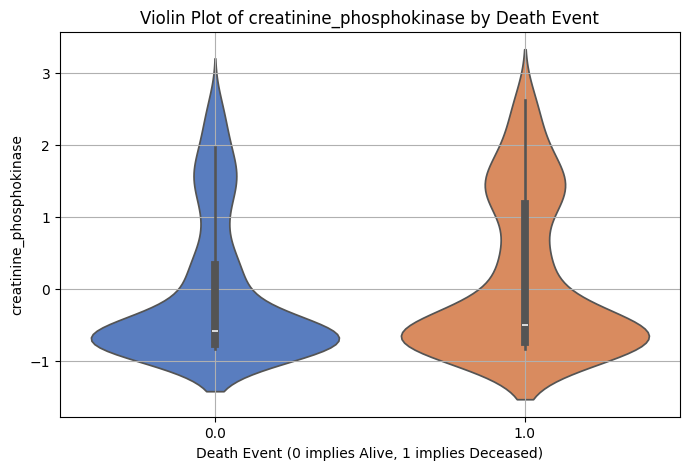

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


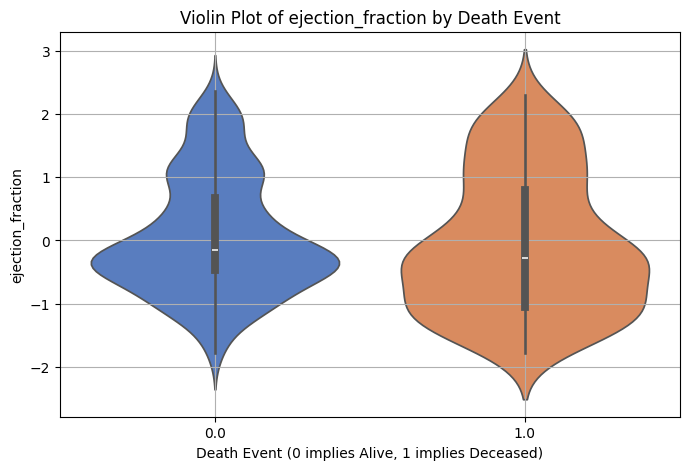

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


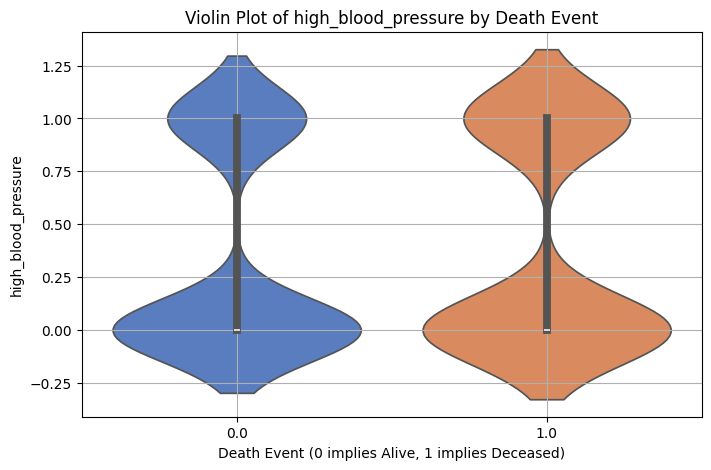

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


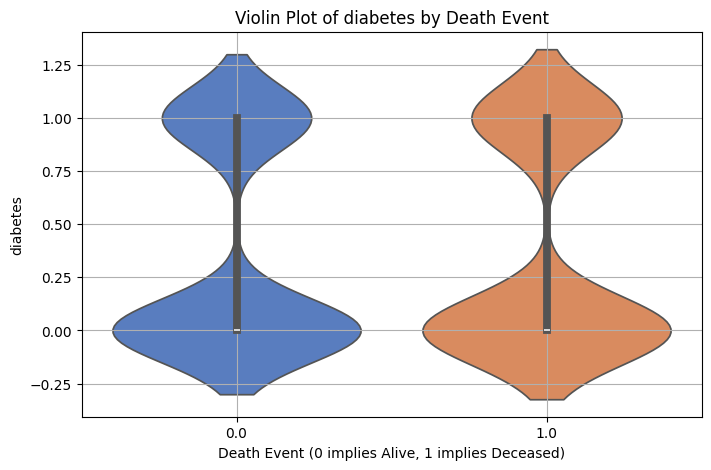

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


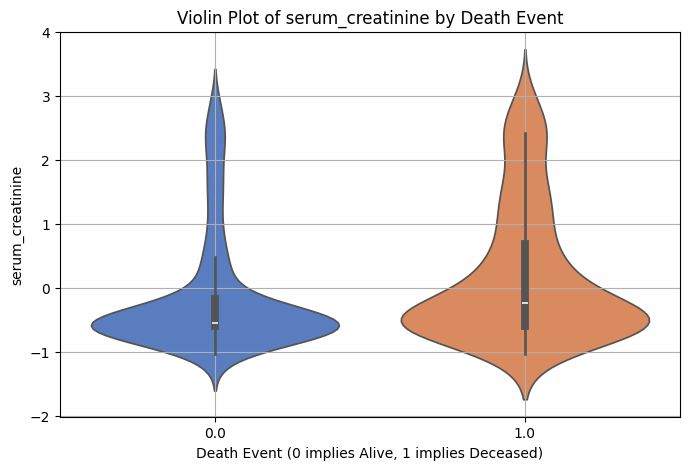

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


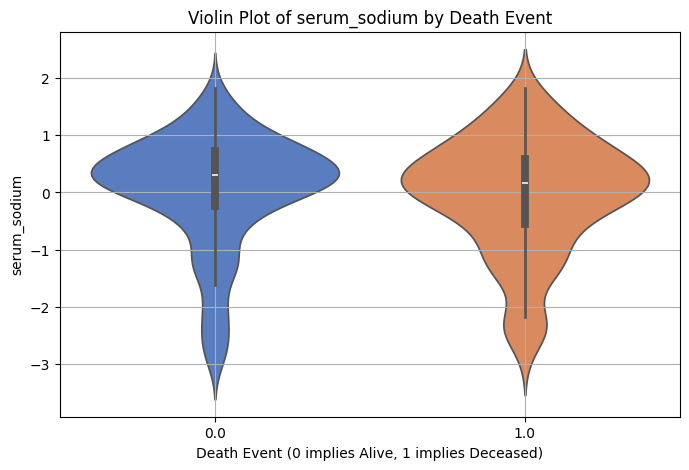

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


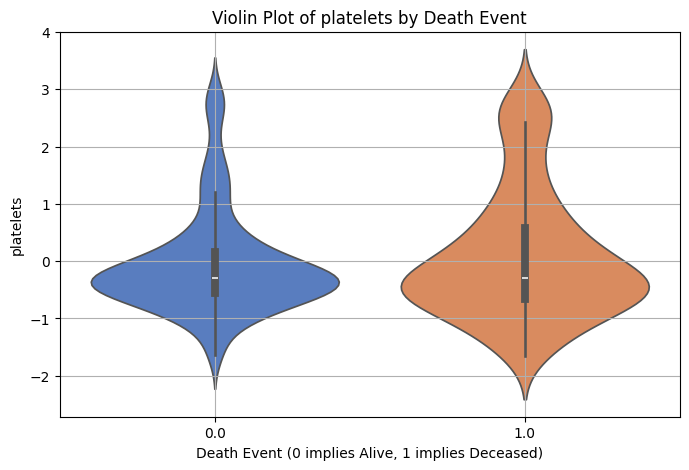

/var/folders/qc/ybg6vndn5jz3cdzgs6d1k5mw0000gn/T/ipykernel_62639/3428282664.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')


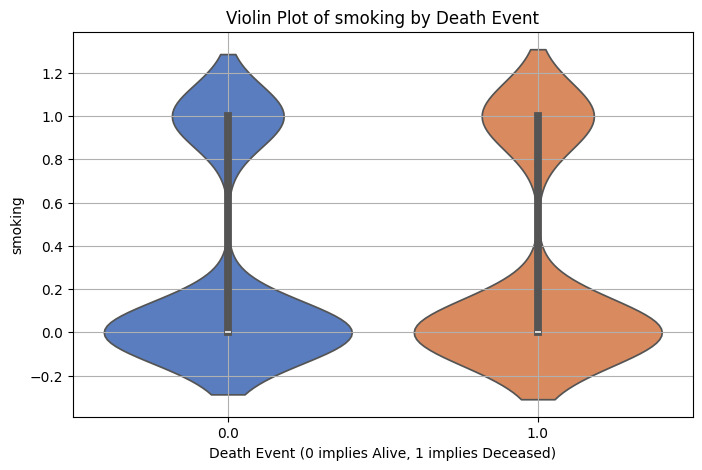

In [27]:
visualize_feature = ['age', 'sex','time','anaemia','creatinine_phosphokinase', 'ejection_fraction','high_blood_pressure','diabetes','serum_creatinine', 'serum_sodium', 'platelets','smoking']


for feature in visualize_feature:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x='DEATH_EVENT', y=feature, data=merged_data_std, palette='muted')
    
    
    plt.title(f'Violin Plot of {feature} by Death Event')
    plt.xlabel('Death Event (0 implies Alive, 1 implies Deceased)')
    plt.ylabel(feature)
    plt.grid()
    plt.show()

In [28]:
from scipy.stats import shapiro
for feature in visualize_feature:
    stat, p_value = shapiro(merged_data_std[visualize_feature])
    print(f" The Shapiro-Wilk Test for {feature}:")
    print(f" The Test Statistic = {stat:.4f}, p-value = {p_value:.4f}")
    
    
    if p_value > 0.05:
        print(f"  {feature} does seem to be normally distributed (p > 0.05)\n")
    else:
        print(f"  {feature} does not seem to be normally distributed (p <= 0.05)\n")

 The Shapiro-Wilk Test for age:
 The Test Statistic = 0.9681, p-value = 0.0000
  age does not seem to be normally distributed (p <= 0.05)

 The Shapiro-Wilk Test for sex:
 The Test Statistic = 0.9681, p-value = 0.0000
  sex does not seem to be normally distributed (p <= 0.05)

 The Shapiro-Wilk Test for time:
 The Test Statistic = 0.9681, p-value = 0.0000
  time does not seem to be normally distributed (p <= 0.05)

 The Shapiro-Wilk Test for anaemia:
 The Test Statistic = 0.9681, p-value = 0.0000
  anaemia does not seem to be normally distributed (p <= 0.05)

 The Shapiro-Wilk Test for creatinine_phosphokinase:
 The Test Statistic = 0.9681, p-value = 0.0000
  creatinine_phosphokinase does not seem to be normally distributed (p <= 0.05)

 The Shapiro-Wilk Test for ejection_fraction:
 The Test Statistic = 0.9681, p-value = 0.0000
  ejection_fraction does not seem to be normally distributed (p <= 0.05)

 The Shapiro-Wilk Test for high_blood_pressure:
 The Test Statistic = 0.9681, p-value 

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/opt/anaconda3/lib/python3.12/site-packa

In [29]:
from scipy.stats import anderson
for feature in visualize_feature:
    result = anderson(merged_data_std[feature])
    print(f"The Anderson-Darling Test for {feature}:")
    print(f"  The Statistic = {result.statistic:.4f}")
    for i, crit_val in enumerate(result.critical_values):
        significance_level = result.significance_level[i]
        if result.statistic > crit_val:
            print(f"  At {significance_level}% significance level: The feature is not normally distributed")
        else:
            print(f"  At {significance_level}% significance level: The feature is Normally distributed")
    print()

The Anderson-Darling Test for age:
  The Statistic = 3.9045
  At 15.0% significance level: The feature is not normally distributed
  At 10.0% significance level: The feature is not normally distributed
  At 5.0% significance level: The feature is not normally distributed
  At 2.5% significance level: The feature is not normally distributed
  At 1.0% significance level: The feature is not normally distributed

The Anderson-Darling Test for sex:
  The Statistic = 113.4473
  At 15.0% significance level: The feature is not normally distributed
  At 10.0% significance level: The feature is not normally distributed
  At 5.0% significance level: The feature is not normally distributed
  At 2.5% significance level: The feature is not normally distributed
  At 1.0% significance level: The feature is not normally distributed

The Anderson-Darling Test for time:
  The Statistic = 7.9370
  At 15.0% significance level: The feature is not normally distributed
  At 10.0% significance level: The featu

In [30]:
from scipy.stats import kruskal
import scikit_posthocs as sp
feature_cont = ['time','age', 'ejection_fraction', 'creatinine_phosphokinase','serum_creatinine', 'serum_sodium', 'platelets']
feature_categorical = ['sex', 'diabetes', 'anaemia', 'high_blood_pressure', 'smoking']
res_dunn={}
res_kruskal={}

In [31]:
for categorical_feature in feature_categorical:
    for continuous_feature in feature_cont:
        print(f"\nKruskal-Wallis test for the {continuous_feature} by {categorical_feature} groups:")
        
        
        data_group = [merged_data_std[continuous_feature][merged_data_std[categorical_feature] == group].dropna() for group in merged_data[categorical_feature].unique()]
        
        
        kruskal_stat, kruskal_p = kruskal(*data_group)
        res_kruskal[(continuous_feature, categorical_feature)] = (kruskal_stat, kruskal_p)
        
        
        if kruskal_p < 0.05:
            print(f"Significant Kruskal-Wallis test (p = {kruskal_p}). Running Dunn's test.")
            
            
            dunn_result = sp.posthoc_dunn(data_group, p_adjust='hommel')
            res_dunn[(continuous_feature, categorical_feature)] = dunn_result
            
            
            print(dunn_result)
        else:
            print(f"Kruskal-Wallis test not significant (p = {kruskal_p}). Skipping Dunn's test.")




Kruskal-Wallis test for the time by sex groups:
Kruskal-Wallis test not significant (p = 0.8943261049448564). Skipping Dunn's test.

Kruskal-Wallis test for the age by sex groups:
Kruskal-Wallis test not significant (p = 0.2071990189988092). Skipping Dunn's test.

Kruskal-Wallis test for the ejection_fraction by sex groups:
Significant Kruskal-Wallis test (p = 0.00914518578219341). Running Dunn's test.
          1         2
1  1.000000  0.009145
2  0.009145  1.000000

Kruskal-Wallis test for the creatinine_phosphokinase by sex groups:
Kruskal-Wallis test not significant (p = 0.188165006339042). Skipping Dunn's test.

Kruskal-Wallis test for the serum_creatinine by sex groups:
Kruskal-Wallis test not significant (p = 0.567770413123487). Skipping Dunn's test.

Kruskal-Wallis test for the serum_sodium by sex groups:
Kruskal-Wallis test not significant (p = 0.1749274523593042). Skipping Dunn's test.

Kruskal-Wallis test for the platelets by sex groups:
Kruskal-Wallis test not significant 

In [32]:
from sklearn.model_selection import train_test_split, LeaveOneOut
training_split=0.8
test_split=0.2
train_data,test_data=train_test_split(merged_data_std, train_size = training_split, random_state=1234)
unnormalised_train_data, unnormalised_test_data = train_test_split(merged_data, train_size = training_split, random_state=1234)

print("Holdout split:")
print(f"Train samples: {len(train_data)}")
print(f"Validation/Test samples: {len(test_data)}")

Holdout split:
Train samples: 478
Validation/Test samples: 120


['sex', 'diabetes', 'anaemia', 'high_blood_pressure', 'smoking', 'age', 'ejection_fraction', 'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']


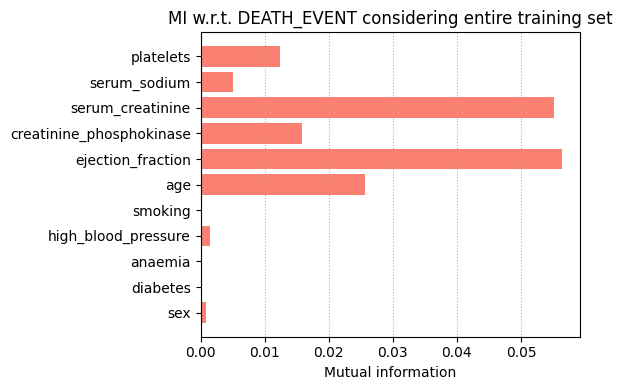

In [33]:
from sklearn.feature_selection import mutual_info_classif
features_comp = feature_categorical.copy()
features_comp.extend(feature_cont)   
features_comp = [feature for feature in features_comp if feature != 'time']
print(features_comp)
MI = (mutual_info_classif(train_data[features_comp],
                             train_data["DEATH_EVENT"], n_neighbors=20,
                             discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                             random_state=1234))

plt.figure(figsize=(6, 4))
plt.barh(y=features_comp, width=MI, color="salmon")
plt.title("MI w.r.t. DEATH_EVENT considering entire training set");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

Mutual information with respect to DEATH_EVENT (Shuffle Split Cross-Validation)


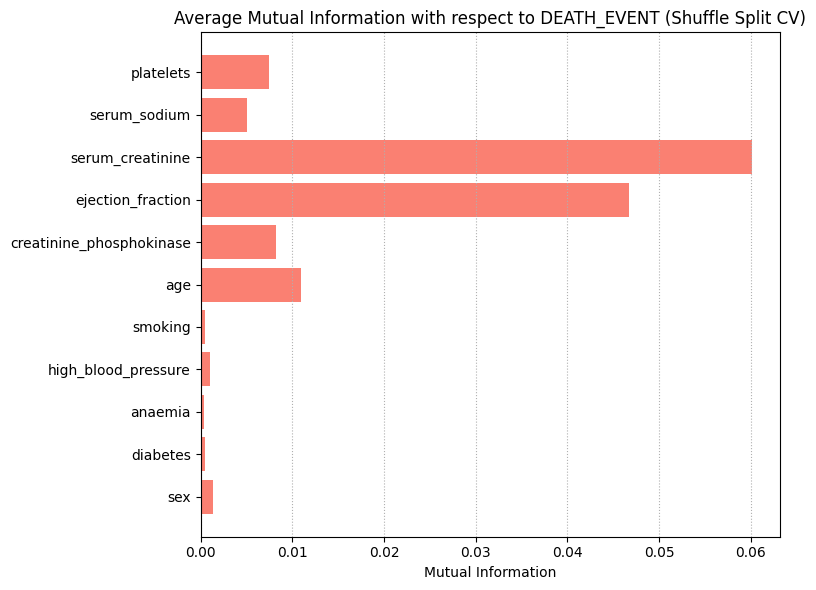

In [34]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import ShuffleSplit

kfold_train_df, kfold_val_df = train_data.copy(), test_data.copy()

categorical_features = ['sex', 'diabetes', 'anaemia', 'high_blood_pressure', 'smoking']
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'platelets']

n_splits = 5
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=1234)

mi_scores = np.zeros((n_splits, len(categorical_features + numerical_features)))

print("Mutual information with respect to DEATH_EVENT (Shuffle Split Cross-Validation)")
for i, (train_idx, val_idx) in enumerate(shuffle_split.split(kfold_train_df)):
    MI = mutual_info_classif(
        kfold_train_df.iloc[train_idx][categorical_features + numerical_features],
        kfold_train_df.iloc[train_idx]["DEATH_EVENT"],
        n_neighbors=20,
        discrete_features=[True] * len(categorical_features) + [False] * len(numerical_features),
        random_state=42
    )
    mi_scores[i, :] = MI

avg_mi_scores = mi_scores.mean(axis=0)

plt.figure(figsize=(8, 6))
plt.barh(y=categorical_features + numerical_features, width=avg_mi_scores, color="salmon")
plt.title("Average Mutual Information with respect to DEATH_EVENT (Shuffle Split CV)")
plt.xlabel("Mutual Information")
plt.gca().xaxis.grid(True, linestyle=':')
plt.tight_layout()
plt.show()



Mutual information with respect to DEATH_EVENT (5-Fold Cross-Validation)


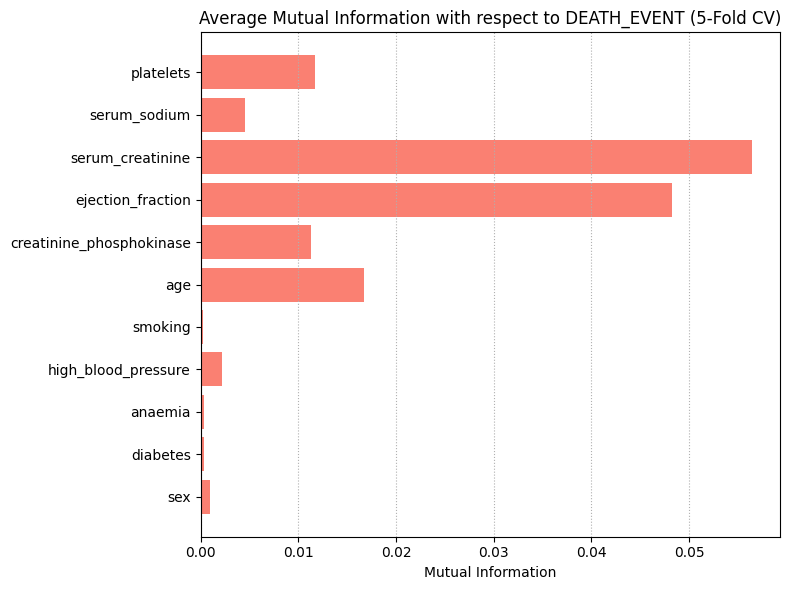

In [35]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import KFold

kfold_train_df, kfold_val_df = train_data.copy(), test_data.copy()

categorical_features = ['sex', 'diabetes', 'anaemia', 'high_blood_pressure', 'smoking']
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'platelets']

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

mi_scores = np.zeros((5, len(categorical_features + numerical_features)))

print("Mutual information with respect to DEATH_EVENT (5-Fold Cross-Validation)")
for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df)):
    MI = mutual_info_classif(
        kfold_train_df.iloc[train_idx][categorical_features + numerical_features],
        kfold_train_df.iloc[train_idx]["DEATH_EVENT"],
        n_neighbors=20,
        discrete_features=[True] * len(categorical_features) + [False] * len(numerical_features),
        random_state=42
    )
    mi_scores[i, :] = MI

avg_mi_scores = mi_scores.mean(axis=0)

plt.figure(figsize=(8, 6))
plt.barh(y=categorical_features + numerical_features, width=avg_mi_scores, color="salmon")
plt.title("Average Mutual Information with respect to DEATH_EVENT (5-Fold CV)")
plt.xlabel("Mutual Information")
plt.gca().xaxis.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


#### Data Modeling

#### Gaussian Process Classifier

In [38]:
import sklearn_crfsuite
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

def feature_extraction(row):
    return {
        'age': row['age'],
        'serum_creatinine': row['serum_creatinine'],
        'creatinine_phosphokinase': row['creatinine_phosphokinase'],
        'ejection_fraction': row['ejection_fraction'],
        'serum_sodium': row['serum_sodium'],
        'platelets': row['platelets'],
        'high_blood_pressure': row['high_blood_pressure'],
        'smoking': row['smoking'],   
    }

X = merged_data.apply(feature_extraction, axis=1).tolist()
y = merged_data['DEATH_EVENT'].tolist()  
print(X)

[{'age': 75.0, 'serum_creatinine': 1.9, 'creatinine_phosphokinase': 582.0, 'ejection_fraction': 20.0, 'serum_sodium': 130.0, 'platelets': 265.0, 'high_blood_pressure': 1.0, 'smoking': 0.0}, {'age': 55.0, 'serum_creatinine': 1.1, 'creatinine_phosphokinase': 7861.0, 'ejection_fraction': 38.0, 'serum_sodium': 136.0, 'platelets': 263.35803000000004, 'high_blood_pressure': 0.0, 'smoking': 0.0}, {'age': 65.0, 'serum_creatinine': 1.3, 'creatinine_phosphokinase': 146.0, 'ejection_fraction': 20.0, 'serum_sodium': 129.0, 'platelets': 162.0, 'high_blood_pressure': 0.0, 'smoking': 1.0}, {'age': 50.0, 'serum_creatinine': 1.9, 'creatinine_phosphokinase': 111.0, 'ejection_fraction': 20.0, 'serum_sodium': 137.0, 'platelets': 210.0, 'high_blood_pressure': 0.0, 'smoking': 0.0}, {'age': 65.0, 'serum_creatinine': 2.7, 'creatinine_phosphokinase': 160.0, 'ejection_fraction': 20.0, 'serum_sodium': 116.0, 'platelets': 327.0, 'high_blood_pressure': 0.0, 'smoking': 0.0}, {'age': 90.0, 'serum_creatinine': 2.1, '

In [39]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import ADASYN


feature_columns = ['age', 'serum_creatinine', 'creatinine_phosphokinase', 
                   'ejection_fraction', 'serum_sodium', 'platelets', 
                   'high_blood_pressure', 'smoking']
target_column = 'DEATH_EVENT'

X = merged_data[feature_columns]
y = merged_data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1234)

adasyn = ADASYN(random_state=1234)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

kernel = 1.0 * RBF(1.0)

gpc = GaussianProcessClassifier(kernel=kernel, random_state=1234)

param_grid = {'kernel': [1.0 * RBF(l) for l in [0.1, 1.0, 10.0]]}
grid_search = GridSearchCV(gpc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)

best_gpc = grid_search.best_estimator_

best_gpc.fit(X_train_res, y_train_res)
y_pred = best_gpc.predict(X_test)

accuracy_gcp = accuracy_score(y_test, y_pred)
class_report_gcp = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_gcp}")
print("Classification Report:\n", class_report_gcp)

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.78      0.80        23
         1.0       0.38      0.43      0.40         7

    accuracy                           0.70        30
   macro avg       0.60      0.61      0.60        30
weighted avg       0.71      0.70      0.71        30



In [129]:
feature_columns = ['age', 'serum_creatinine', 'creatinine_phosphokinase', 
                   'ejection_fraction', 'serum_sodium', 'platelets', 
                   'high_blood_pressure', 'smoking']
target_column = 'DEATH_EVENT'

X = merged_data[feature_columns]
y = merged_data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1234)

#### Bayesian network with structure learning and parameter learning

In [132]:
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

data = merged_data.copy()

continuous_columns = ['age', 'serum_creatinine', 'creatinine_phosphokinase', 
                      'ejection_fraction', 'serum_sodium', 'platelets']

for col in continuous_columns:
    data[col] = pd.qcut(data[col], q=4, labels=False) 
hc = HillClimbSearch(data)
best_model = hc.estimate(scoring_method=BicScore(data))

print("Learned edges:", best_model.edges())

bn_model = BayesianNetwork(best_model.edges())
bn_model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in bn_model.get_cpds():
    print(cpd)

inference = VariableElimination(bn_model)

query_result = inference.query(variables=['DEATH_EVENT'], evidence={'smoking': 1})
print(query_result)


  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned edges: [('ejection_fraction', 'DEATH_EVENT'), ('serum_creatinine', 'creatinine_phosphokinase'), ('serum_creatinine', 'platelets'), ('serum_creatinine', 'serum_sodium'), ('sex', 'smoking'), ('DEATH_EVENT', 'serum_creatinine')]
+----------------------+----------+
| ejection_fraction(0) | 0.267559 |
+----------------------+----------+
| ejection_fraction(1) | 0.234114 |
+----------------------+----------+
| ejection_fraction(2) | 0.249164 |
+----------------------+----------+
| ejection_fraction(3) | 0.249164 |
+----------------------+----------+
+-------------------+-----+----------------------+
| ejection_fraction | ... | ejection_fraction(3) |
+-------------------+-----+----------------------+
| DEATH_EVENT(0.0)  | ... | 0.5771812080536913   |
+-------------------+-----+----------------------+
| DEATH_EVENT(1.0)  | ... | 0.4228187919463087   |
+-------------------+-----+----------------------+
+---------------------+---------------------+----------------------+
| DEATH_EVENT   

In [134]:
print("Nodes in the model:", bn_model.nodes())


Nodes in the model: ['ejection_fraction', 'DEATH_EVENT', 'serum_creatinine', 'creatinine_phosphokinase', 'platelets', 'serum_sodium', 'sex', 'smoking']


In [136]:
for col in continuous_columns:  
    X_test[col] = pd.qcut(X_test[col], q=4, labels=False)


In [138]:
predictions_bn = []
probabilities_bn = []
for idx, row in X_test.iterrows():
   
    evidence = {col: row[col] for col in row.index if col in bn_model.nodes() and col != 'DEATH_EVENT'}
  
    query_result = inference.query(variables=['DEATH_EVENT'], evidence=evidence)
    predicted_class = query_result.values.argmax() 
    predictions_bn.append(predicted_class)
    probabilities_bn.append(query_result.values[1])
accuracy_structure_learning = accuracy_score(y_test, predictions_bn)
class_report_structure_learning= classification_report(y_test, predictions_bn)
print(f"Accuracy: {accuracy_structure_learning * 100:.2f}%")
print("Classification Report:\n", class_report_structure_learning)
class_report_structure_learning_dict = classification_report(y_test, predictions_bn, output_dict=True)


Accuracy: 83.33%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.87      0.89        23
         1.0       0.62      0.71      0.67         7

    accuracy                           0.83        30
   macro avg       0.77      0.79      0.78        30
weighted avg       0.84      0.83      0.84        30



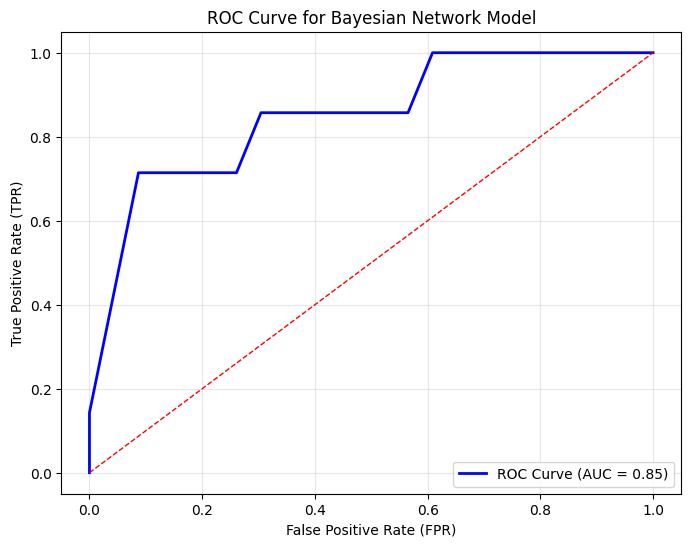

In [140]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, probabilities_bn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1)
plt.title("ROC Curve for Bayesian Network Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

#### Traditional Bayesian Network 

In [51]:
from sklearn.preprocessing import KBinsDiscretizer

continuous_features = ['age', 'time', 'ejection_fraction', 'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')  # You can adjust n_bins and strategy

merged_data_std[continuous_features] = discretizer.fit_transform(merged_data_std[continuous_features])
merged_data_std['DEATH_EVENT'] = merged_data_std['DEATH_EVENT'].astype(int)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [53]:
train_data, test_data = train_test_split(merged_data_std, test_size=0.30, random_state=12345)

In [55]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import TreeSearch
import networkx as nx

In [57]:
tree_search = TreeSearch(train_data)
best_model = tree_search.estimate() 

Building tree:   0%|          | 0/78.0 [00:00<?, ?it/s]

In [58]:
print("Learned DAG edges:", best_model.edges())

Learned DAG edges: [('serum_creatinine', 'platelets'), ('serum_creatinine', 'creatinine_phosphokinase'), ('serum_creatinine', 'age'), ('serum_creatinine', 'sex'), ('serum_creatinine', 'diabetes'), ('platelets', 'time'), ('creatinine_phosphokinase', 'ejection_fraction'), ('sex', 'smoking'), ('time', 'DEATH_EVENT'), ('time', 'high_blood_pressure'), ('time', 'anaemia'), ('ejection_fraction', 'serum_sodium')]


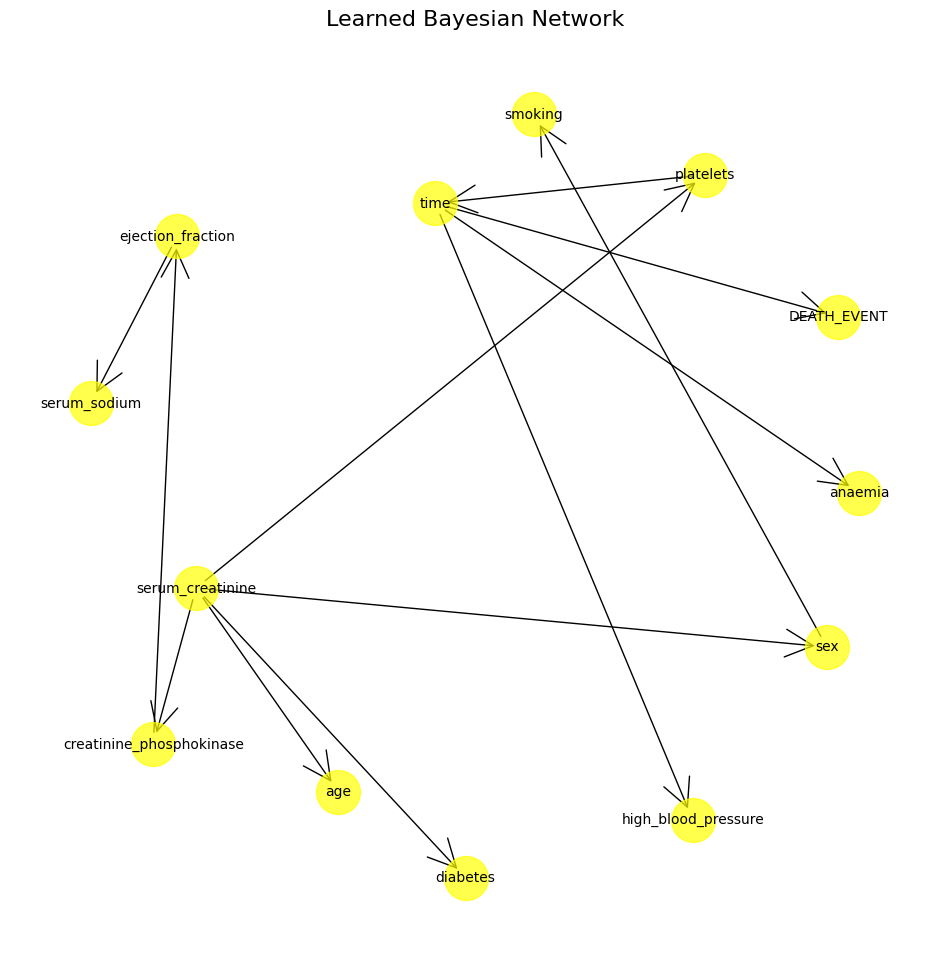

In [59]:
edges = best_model.edges()
G = nx.DiGraph(edges)

plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G, k=5, iterations=100) 
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='yellow', alpha=0.7)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=50, edge_color='black', alpha=1)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.title('Learned Bayesian Network', fontsize=16)
plt.axis('off')  
plt.show()

In [63]:
model = BayesianNetwork(best_model.edges())
model.fit(train_data)

In [65]:
from pgmpy.inference import VariableElimination


target = 'DEATH_EVENT'
test_data[target] = test_data[target].astype(int)  
inference = VariableElimination(model)



test_data = test_data.copy()  
predictions = []

for _, row in test_data.iterrows():
    evidence = row.drop(target).to_dict() 
    
    predicted = inference.map_query(variables=[target], evidence=evidence)
    predictions.append(predicted[target])

y_pred = np.array(predictions)

y_test = test_data[target].values


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [66]:
accuracy_Bayesian_Network = accuracy_score(y_test, y_pred)
classification_Bayesian_Network = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_Bayesian_Network:.2f}")
print("\nClassification Report:\n",classification_Bayesian_Network)

Accuracy: 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.90      0.77       104
           1       0.75      0.39      0.52        76

    accuracy                           0.69       180
   macro avg       0.71      0.65      0.64       180
weighted avg       0.70      0.69      0.66       180



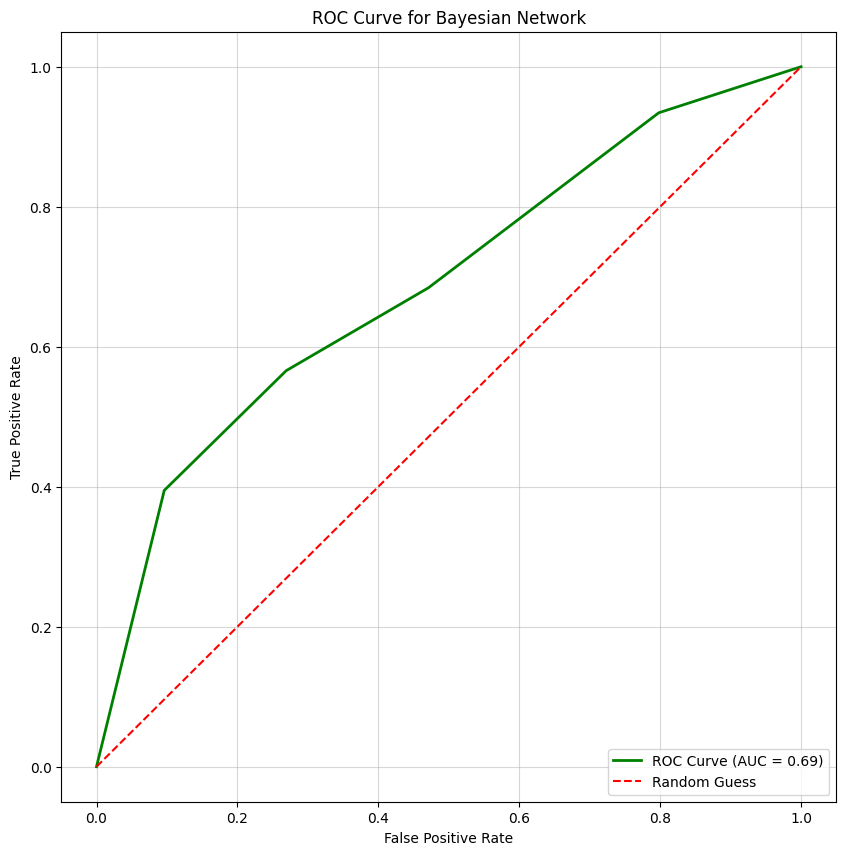

ROC AUC Score: 0.69


In [67]:
from sklearn.metrics import roc_curve, auc, roc_auc_score


probabilities = []
for _, row in test_data.iterrows():
    evidence = row.drop(target).to_dict()
    prob = inference.query(variables=[target], evidence=evidence)
    probabilities.append(prob.values[1])  


y_test = test_data[target].values

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bayesian Network')
plt.legend(loc='lower right')
plt.grid(alpha=0.5)
plt.show()
print(f"ROC AUC Score: {roc_auc:.2f}")


In [68]:
query_result = inference.query(variables=['DEATH_EVENT'], 
                           evidence={'sex': 1, 'anaemia': 0, 'high_blood_pressure': 1, 'smoking': 0})
print(query_result)


+----------------+--------------------+
| DEATH_EVENT    |   phi(DEATH_EVENT) |
+================+====================+
| DEATH_EVENT(0) |             0.5954 |
+----------------+--------------------+
| DEATH_EVENT(1) |             0.4046 |
+----------------+--------------------+


In [69]:
from sklearn.preprocessing import KBinsDiscretizer

continuous_features = ['age', 'time', 'ejection_fraction', 'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium', 'platelets']

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
merged_data_std[continuous_features] = discretizer.fit_transform(merged_data_std[continuous_features])
merged_data_std['DEATH_EVENT'] = merged_data_std['DEATH_EVENT'].astype(int)
X = merged_data_std[feature_cont + feature_categorical]
y = merged_data_std['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


#### Hidden Markov model

In [97]:
from hmmlearn.hmm import GaussianHMM
hmm_model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=5000)
hmm_model.fit(train_data)
y_pred_hmm = hmm_model.predict(test_data)


In [99]:
accuracy_hmm = accuracy_score(y_test, y_pred_hmm)
print(f"Test Accuracy: {accuracy_hmm:.4f}")
classification_report_hmm=classification_report(y_test, y_pred_hmm)
print("\nClassification Report:",classification_report_hmm)


Test Accuracy: 0.5833

Classification Report:               precision    recall  f1-score   support

           0       0.63      0.58      0.60        98
           1       0.54      0.59      0.56        82

    accuracy                           0.58       180
   macro avg       0.58      0.58      0.58       180
weighted avg       0.59      0.58      0.58       180



### Model selection

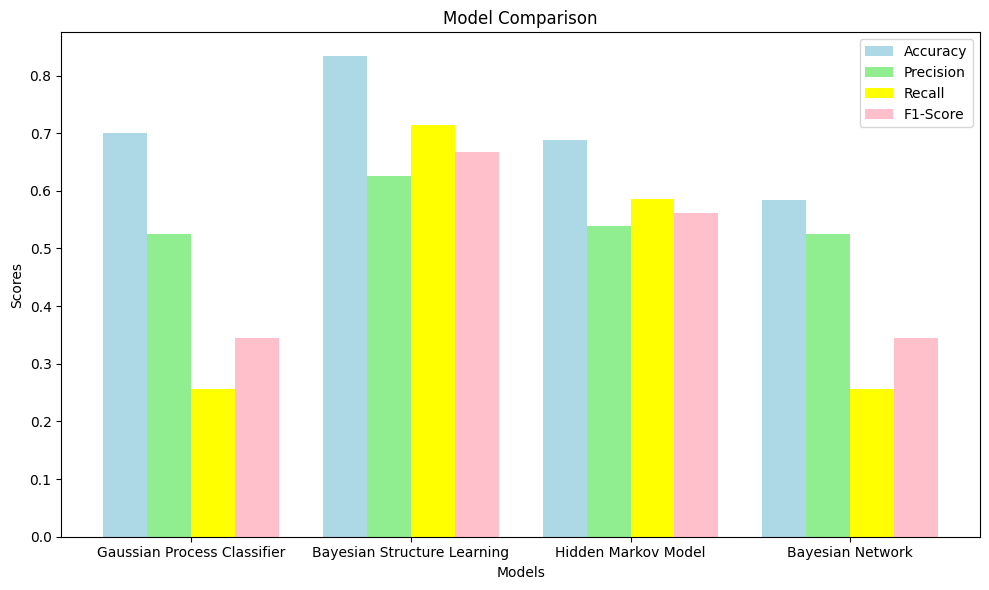

In [102]:
models = ['Gaussian Process Classifier',  'Bayesian Structure Learning', 'Hidden Markov Model','Bayesian Network']
accuracy = [accuracy_gcp, accuracy_structure_learning,accuracy_Bayesian_Network, accuracy_hmm]



precision = [
    classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
    class_report_structure_learning_dict['1.0']['precision'],
    classification_report(y_test, y_pred_hmm, output_dict=True)['1']['precision'],
    classification_report(y_test, predictions, output_dict=True)['1']['precision']
]

recall = [
    classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
    class_report_structure_learning_dict['1.0']['recall'],
    classification_report(y_test, y_pred_hmm, output_dict=True)['1']['recall'],
    classification_report(y_test, predictions, output_dict=True)['1']['recall']
]

f1_score = [
    classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
    class_report_structure_learning_dict['1.0']['f1-score'],
    classification_report(y_test, y_pred_hmm, output_dict=True)['1']['f1-score'],
    classification_report(y_test, predictions, output_dict=True)['1']['f1-score']
]


width = 0.2

x = np.arange(len(models))  

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width*1.5, accuracy, width, label='Accuracy', color='lightblue')
ax.bar(x - width/2, precision, width, label='Precision', color='lightgreen')
ax.bar(x + width/2, recall, width, label='Recall', color='yellow')
ax.bar(x + width*1.5, f1_score, width, label='F1-Score', color='pink')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.tight_layout()
plt.show()


##### For this dataset, the Bayesian Structure Learning model performs best due to its balanced recall and F1 score, excellent accuracy, and precision. Gaussian Process Classifiers (GPCs) could use improved minority class management, though, as they have trouble with recall. With its poor precision and recall, the Hidden Markov Model (HMM) demonstrated limited efficacy and was hence less appropriate for this job. Although it did rather well, the Bayesian Network's limited recall in unbalanced datasets was a drawback. The structure learning method assumes that the relationships between features are fixed, which is a weakness of the strategy.

In [146]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib
import sklearn
import scipy
import imblearn
import xgboost
import pgmpy
import hmmlearn
import networkx

print("Python version:", sys.version)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("SciPy version:", scipy.__version__)
print("Imbalanced-learn version:", imblearn.__version__)
print("XGBoost version:", xgboost.__version__)
print("pgmpy version:", pgmpy.__version__)
print("hmmlearn version:", hmmlearn.__version__)
print("NetworkX version:", networkx.__version__)


Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]
Pandas version: 2.2.2
Seaborn version: 0.13.2
Matplotlib version: 3.9.3
Scikit-learn version: 1.4.2
SciPy version: 1.11.4
Imbalanced-learn version: 0.12.3
XGBoost version: 2.1.2
pgmpy version: 0.1.26
hmmlearn version: 0.3.3
NetworkX version: 3.2.1
